# WorldPop

In [2]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [13]:
import matplotlib.pyplot as plt

from src.datasources import worldpop, codab
from src.constants import AOI_ADM1_PCODES

In [5]:
adm2 = codab.load_codab(admin_level=2)
adm2_aoi = adm2[adm2["ADM1_PCODE"].isin(AOI_ADM1_PCODES)]

In [10]:
da = worldpop.load_raw_worldpop()
da_aoi = da.rio.clip(adm2_aoi.geometry, all_touched=True)
da_aoi = da_aoi.where(da_aoi > 0)

Text(0.5, 1.0, 'Population, 2020')

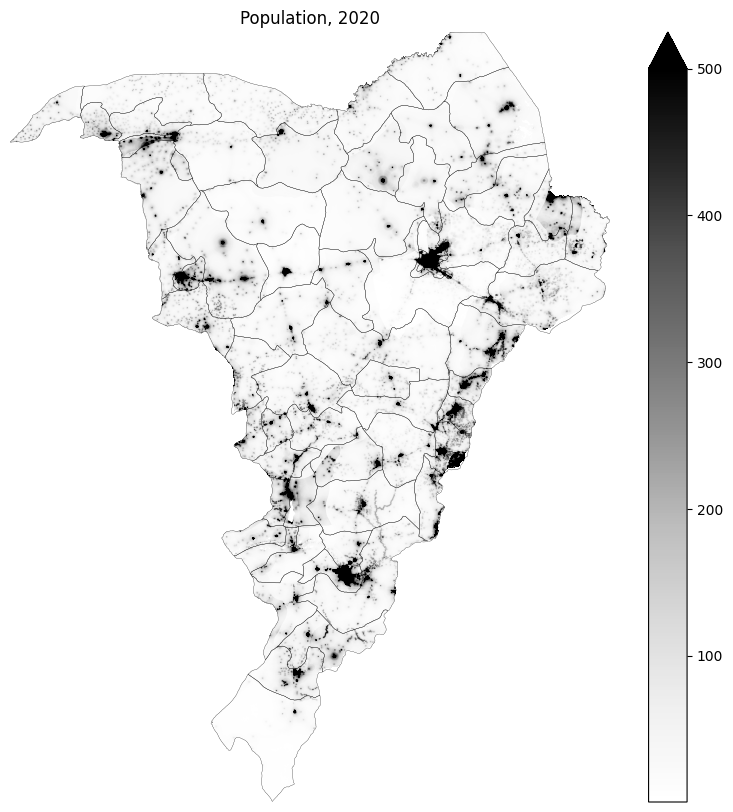

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
da_aoi.plot(ax=ax, cmap="Greys", vmax=500)
adm2_aoi.boundary.plot(ax=ax, linewidth=0.2, color="k")
ax.axis("off")
ax.set_title("Population, 2020")

In [34]:
da.rio.crs

CRS.from_epsg(4326)